# Applied Machine Learning, Module 1: A simple classification task

## Import required modules and load data files

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape

(59, 7)

In [4]:
# crear un mapping de fuit_label a fruit_name para interpretar más fácilmente los resultados
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Examining the data

In [5]:
%matplotlib inline

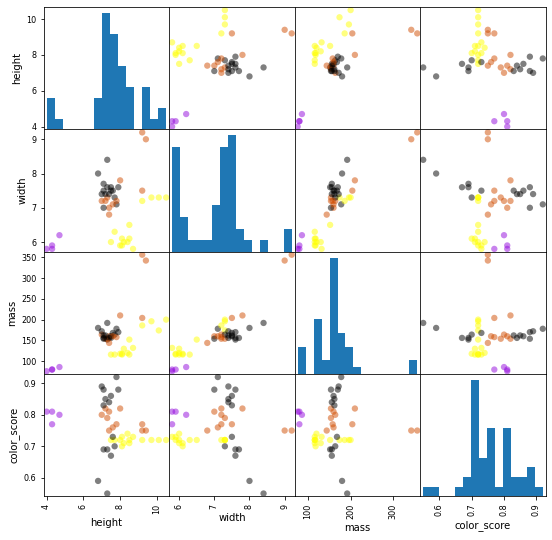

In [6]:
#plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width','mass','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

## Plotting a 3D scatter plot

In [7]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

amlp


## Create train-test split

In [8]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default es 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

## Create a classifier object

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## Train the classifier (fit the estimator) using training data

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

##  Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

## Use the trained k-NN classifier model to classify new, previously unseen objects

In [12]:
#first example: a samll fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

/home/daniel/miniconda3/envs/amlp/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [13]:
#second example: a larger, elongated fruit with mass 100g, width 6.3 cm and height 8.4 cm
fruit_prediction = knn.predict([[100, 6.3, 8.4]])
lookup_fruit_name[fruit_prediction[0]]

/home/daniel/miniconda3/envs/amlp/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

## Plot decision boundaries of the k-NN classifier

/home/daniel/cursos_online/amlp/adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


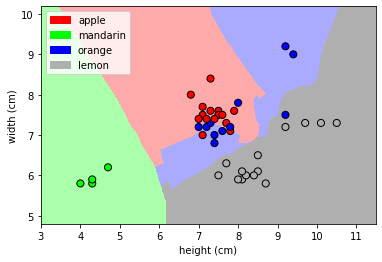

In [14]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

## How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

([<matplotlib.axis.XTick at 0x7fe92bf82f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

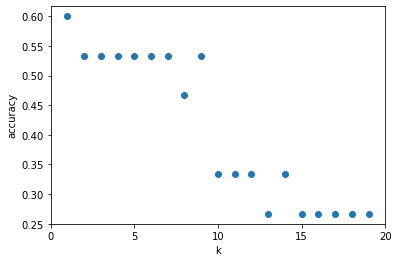

In [20]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## How sensitive is k-NN classification accuracy to the train/test split proportion?

Text(0, 0.5, 'accuracy')

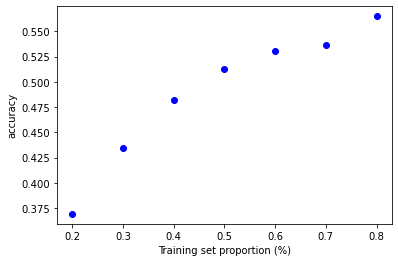

In [21]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
    
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')